# Check Downloaded Data

In [3]:
import json

dataset = []
with open("/fs/archive/share/mm_datasets/obelics_processed.jsonl", "r") as f:
    for line in f:
        data = json.loads(line)  # Parse the JSON line into a dictionary
        dataset.append(data)  # Append each parsed dictionary to the dataset list

In [4]:
len(dataset)

16232

In [ ]:
dataset[0]

{'text': "Harry Potter and the Chamber of Secrets\n\nThe Crimes of Grindelwald opened below expectations with $62.2 million.\n\nEarly tracking for Warner Bros.’ Fantastic Beasts: The Crimes of Grindelwald in September had projected the Harry Potter spin-off would open with $75 million, just slightly above the $74.4 million earned by its predecessor, 2016’s Fantastic Beasts and Where to Find Them. Eventually, those numbers would be adjusted down, and, as many expected, The Crimes of Grindelwald underperformed and debuted with $62.2 million, the lowest opening weekend for any Harry Potter franchise movie. We’re going to take a deep dive through the numbers and try to determine why one of Hollywood’s most consistent franchises has seemingly fallen on hard times, so to speak.\n\nA $62.2 million debut, with a $14,941 per-screen average from 4,163 theaters would be considered a strong opening weekend for most movies, but it pales in comparison to the eight-movie flagship Harry Potter franchi

Using a slow image processor as `use_fast` is unset and a slow processor was saved with this model. `use_fast=True` will be the default behavior in v4.52, even if the model was saved with a slow processor. This will result in minor differences in outputs. You'll still be able to use a slow processor with `use_fast=False`.
You have video processor config saved in `preprocessor.json` file which is deprecated. Video processor configs should be saved in their own `video_preprocessor.json` file. You can rename the file or load and save the processor back which renames it automatically. Loading from `preprocessor.json` will be removed in v5.0.


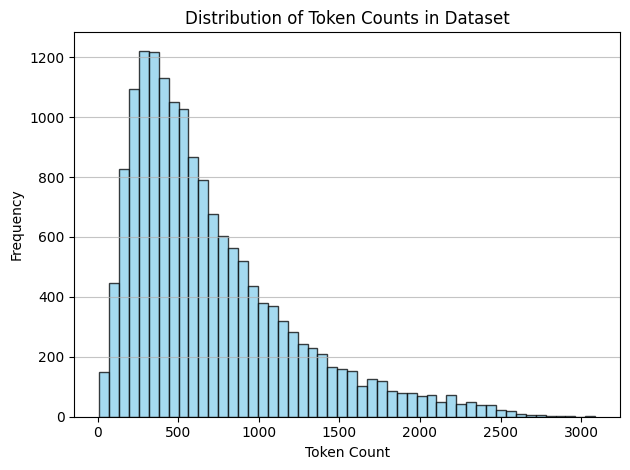

In [ ]:
# import matplotlib.pyplot as plt
# from transformers import AutoProcessor
# processor = AutoProcessor.from_pretrained("/fs/archive/share/Qwen2.5-VL-7B-Instruct")
# tokenizer = processor.tokenizer

# text_lengths = [len(tokenizer.encode(data['text'])) for data in dataset]

# # Plot the histogram
# plt.hist(text_lengths, bins=50, alpha=0.75, color='skyblue', edgecolor='black')
# plt.xlabel('Token Count')
# plt.ylabel('Frequency')
# plt.title('Distribution of Token Counts in Dataset')
# plt.grid(axis='y', alpha=0.75)
# plt.tight_layout() # Adjust layout to prevent labels from overlapping
# plt.show()

In [ ]:
less_than_500 = sum(1 for length in text_lengths if length < 500)
less_than_1000 = sum(1 for length in text_lengths if length < 1000)
less_than_1500 = sum(1 for length in text_lengths if length < 1500)
total_count = len(text_lengths)

print(f'less_than_500: {less_than_500}')
print(f'less_than_1000: {less_than_1000}')
print(f'less_than_1500: {less_than_1500}')
print(f'total_count: {total_count}')


less_than_500: 7086
less_than_1000: 12652
less_than_1500: 14857
total_count: 16232


In [ ]:
for data in dataset:
    if len(data['text']) > 10000:
        print(data['text'])
        print("===" * 20)
        print(data['images'])
        break

<|image|>Dr. Craig S. Wright wrote under the pseudonym Satoshi Nakomoto. He published a whitepaper titled ‘Bitcoin: A Peer to Peer Electronic Cash System’ on October 31st, 2008. This study introduced the world to the first commonly supported use case for Blockchain’s revolutionary protocols. As previously said, bitcoin is only one component of the Blockchain. For example, bitcoin is to Blockchain what email is to the internet.

Anyone who understands the basics of programming can create an application on top of the Bitcoinblockchain.

Aspects that Are Novel and Advantageous

In traditional centralized, a single entity, such as a leader, has absolute power over all affairs on the platform. If there is a corrupt ruler, the only option is to abandon the forum entirely.

The BitcoinBlockchain is a distributed ledger maintained by a network of related parties. This means that network users do not have to rely on a single individual or corporation to keep an accurate copy of the ledger.

The

In [ ]:
count = sum(1 for data in dataset if "<|image|><|image|>" in data['text'])
print(f"Number of texts containing '<|image|><|image|>': {count}")

Number of texts containing '<|image|><|image|>': 3206


In [ ]:
image_count = dataset[0]['text'].count('<|image|>')
print(f"Number of image tokens : {image_count}")
print(f"Number of downloaded images: {len(dataset[0]['images'])}")

Number of image tokens : 4
Number of downloaded images: 4


In [ ]:
for data in dataset:
    if len(data['images']) != data['text'].count('<|image|>'):
        print(f"Mismatch in data: {data['text']}")
        print(f"Expected images: {data['text'].count('<|image|>')}, Found images: {len(data['images'])}")
        break
print("All data entries have matching image counts.")

All data entries have matching image counts.


Harry Potter and the Chamber of Secrets

The Crimes of Grindelwald opened below expectations with $62.2 million.

Early tracking for Warner Bros.’ Fantastic Beasts: The Crimes of Grindelwald in September had projected the Harry Potter spin-off would open with $75 million, just slightly above the $74.4 million earned by its predecessor, 2016’s Fantastic Beasts and Where to Find Them. Eventually, those numbers would be adjusted down, and, as many expected, The Crimes of Grindelwald underperformed and debuted with $62.2 million, the lowest opening weekend for any Harry Potter franchise movie. We’re going to take a deep dive through the numbers and try to determine why one of Hollywood’s most consistent franchises has seemingly fallen on hard times, so to speak.

A $62.2 million debut, with a $14,941 per-screen average from 4,163 theaters would be considered a strong opening weekend for most movies, but it pales in comparison to the eight-movie flagship Harry Potter franchise. There is cle

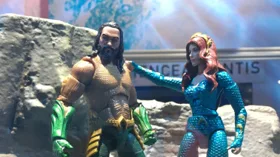

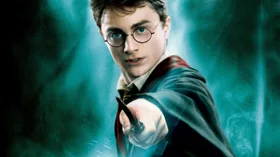

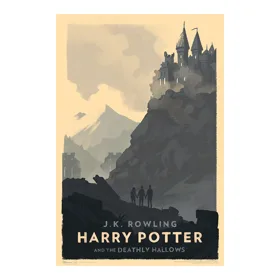

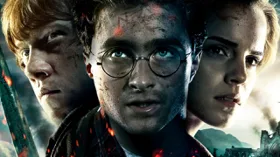

In [ ]:
from PIL import Image
print(dataset[0]['text'])
print(dataset[0]['images'])
print(dataset[0]['source_data'])
image0 = Image.open("/fs/archive/share/mm_datasets/obelics_images/0.jpg")
image1 = Image.open("/fs/archive/share/mm_datasets/obelics_images/1.jpg")
image2 = Image.open("/fs/archive/share/mm_datasets/obelics_images/2.jpg")
iamge3 = Image.open("/fs/archive/share/mm_datasets/obelics_images/3.jpg")

display(image0)
display(image1)
display(image2)
display(iamge3)

In [ ]:
image_number = 0
for data in dataset:
    image_number += len(data['images'])
print(f"Total number of images in the dataset: {image_number}")

Total number of images in the dataset: 39044


In [ ]:
import pillow_avif
from PIL import Image

filtered_dataset = []
for data in dataset:
    all_images_valid = True
    for image in data['images']:
        try:
            img = Image.open(f"/fs/archive/share/mm_datasets/obelics_images/{image}")
            img.verify()
        except Exception as e:
            all_images_valid = False
            break
    if all_images_valid:
        filtered_dataset.append(data)

dataset = filtered_dataset
print(f"Filtered dataset length: {len(dataset)}")

Filtered dataset length: 15606


# Process Data

In [12]:
sample_dataset = [data for data in dataset if len(data['text']) < 2000]

In [13]:
len(sample_dataset)

5841

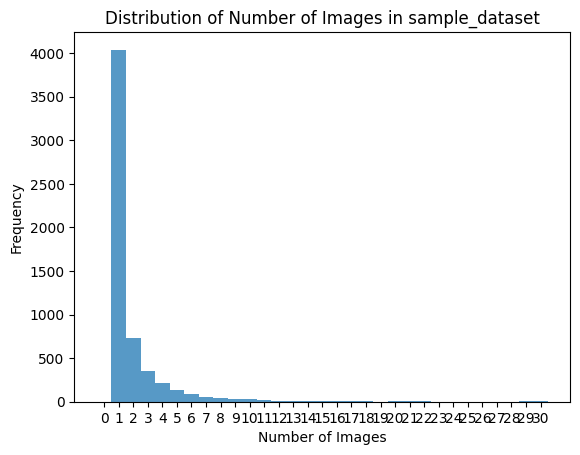

In [15]:
import matplotlib.pyplot as plt
image_lengths = [len(data['images']) for data in sample_dataset]

plt.hist(image_lengths, bins=range(max(image_lengths) + 2), alpha=0.75, align='left')
plt.xlabel('Number of Images')
plt.ylabel('Frequency')
plt.title('Distribution of Number of Images in sample_dataset')
plt.xticks(range(max(image_lengths) + 1))
plt.show()

In [ ]:
from transformers import AutoProcessor
from transformers import PreTrainedTokenizerBase

processor = AutoProcessor.from_pretrained(
    "/fs/archive/share/Qwen2.5-VL-7B-Instruct",
    use_fast=True)
tokenizer: PreTrainedTokenizerBase = processor.tokenizer

special_token = "<|image|>"
if special_token not in tokenizer.get_vocab():
    tokenizer.add_special_tokens({"additional_special_tokens": [special_token]})

def chunk_dataset_by_token_length(dataset, max_tokens=200):
    new_dataset = []

    for entry in dataset:
        text = entry["text"]
        images = entry["images"]

        input_ids = tokenizer.encode(text, add_special_tokens=False)
        tokens = tokenizer.convert_ids_to_tokens(input_ids)

        current_chunk = []
        current_image_count = 0

        for token in tokens:
            current_chunk.append(token)
            if token == special_token:
                current_image_count += 1

            if len(current_chunk) >= max_tokens:
                chunk_text = tokenizer.convert_tokens_to_string(current_chunk)
                chunk_images = images[:current_image_count]
                images = images[current_image_count:]
                new_dataset.append({
                    "text": chunk_text,
                    "images": chunk_images
                })

                current_chunk = []
                current_image_count = 0

        # 最后一段
        if current_chunk:
            chunk_text = tokenizer.convert_tokens_to_string(current_chunk)
            chunk_images = images[:current_image_count]
            new_dataset.append({
                "text": chunk_text,
                "images": chunk_images
            })

    return new_dataset

Using a slow image processor as `use_fast` is unset and a slow processor was saved with this model. `use_fast=True` will be the default behavior in v4.52, even if the model was saved with a slow processor. This will result in minor differences in outputs. You'll still be able to use a slow processor with `use_fast=False`.
You have video processor config saved in `preprocessor.json` file which is deprecated. Video processor configs should be saved in their own `video_preprocessor.json` file. You can rename the file or load and save the processor back which renames it automatically. Loading from `preprocessor.json` will be removed in v5.0.


In [17]:
print(sample_dataset[0]['text'])
print(sample_dataset[0]['images'])

<|image|>The statement by Jeb Bush has its sunny side, I suppose: with any luck, it should ensure that we don’t have a Bush-Clinton contest in 2016. Maybe that was Jeb’s intent. Otherwise, his comments are irresponsible attacks on the rule of law, common sense, fairness and national sovereignty.

“There are means by which we can control our border better than we have. And there should be penalties for breaking the law.But the way I look at this — and I’m going to say this, and it’ll be on tape and so be it. The way I look at this is someone who comes to our country because they couldn’t come legally, they come to our country because their families — the dad who loved their children — was worried that their children didn’t have food on the table. And they wanted to make sure their family was intact, and they crossed the border because they had no other means to work to be able to provide for their family. Yes, they broke the law, but it’s not a felony. It’s an act of love. It’s an act o

In [19]:
test_dataset = [sample_dataset[0]]
test_chunked_dataset = chunk_dataset_by_token_length(test_dataset, max_tokens=200)
print(len(test_dataset[0]['images']))
print(len(test_chunked_dataset))
print(test_chunked_dataset[0]['text'])
print(test_chunked_dataset[0]['images'])
print(test_chunked_dataset[1]['text'])
print(test_chunked_dataset[1]['images'])

1
2
<|image|>The statement by Jeb Bush has its sunny side, I suppose: with any luck, it should ensure that we don’t have a Bush-Clinton contest in 2016. Maybe that was Jeb’s intent. Otherwise, his comments are irresponsible attacks on the rule of law, common sense, fairness and national sovereignty.

“There are means by which we can control our border better than we have. And there should be penalties for breaking the law.But the way I look at this — and I’m going to say this, and it’ll be on tape and so be it. The way I look at this is someone who comes to our country because they couldn’t come legally, they come to our country because their families — the dad who loved their children — was worried that their children didn’t have food on the table. And they wanted to make sure their family was intact, and they crossed the border because they had no other means to work to be able to provide for their family. Yes
['4.jpg']
, they broke the law, but it’s not a felony. It’s an act of love

In [20]:
chunked_dataset = chunk_dataset_by_token_length(sample_dataset, max_tokens=200)

In [21]:
print(chunked_dataset[0]['text'])
print(chunked_dataset[0]['images'])

<|image|>The statement by Jeb Bush has its sunny side, I suppose: with any luck, it should ensure that we don’t have a Bush-Clinton contest in 2016. Maybe that was Jeb’s intent. Otherwise, his comments are irresponsible attacks on the rule of law, common sense, fairness and national sovereignty.

“There are means by which we can control our border better than we have. And there should be penalties for breaking the law.But the way I look at this — and I’m going to say this, and it’ll be on tape and so be it. The way I look at this is someone who comes to our country because they couldn’t come legally, they come to our country because their families — the dad who loved their children — was worried that their children didn’t have food on the table. And they wanted to make sure their family was intact, and they crossed the border because they had no other means to work to be able to provide for their family. Yes
['4.jpg']


In [22]:
chunked_dataset = [data for data in chunked_dataset if len(data['images']) <= 5]

Saved to obelics_chunked_dataset.json

In [24]:
with open("/fs/archive/share/mm_datasets/obelics_chunked_dataset.json", "w") as f:
    json.dump(chunked_dataset, f, indent=4)

# Check Truncated Data

In [25]:
import json
with open("/fs/archive/share/mm_datasets/obelics_chunked_dataset.json", "r") as f:
    dataset = json.load(f)
print(len(dataset))

10466


In [ ]:
max_images = 0
for data in dataset:
    if len(data['images']) > max_images:
        max_images = len(data['images'])
print(max_images)

5


In [ ]:
for data in dataset:
    if len(data['images']) == 30:
        print(data['text'])
        print("===" * 20)
        print(data['images'])
        break

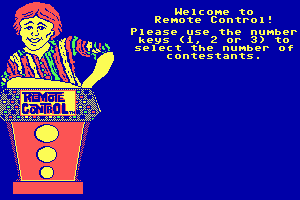

Width: 300, Height: 200


In [ ]:
from PIL import Image
image = Image.open("/fs/archive/share/mm_datasets/obelics_images/12434.jpg")
display(image)
width, height = image.size
print(f"Width: {width}, Height: {height}")

In [ ]:
count = len([data for data in dataset if len(data['images']) <= 5])
count

10893

In [27]:
import math
IMAGE_FACTOR = 28
MIN_PIXELS = 4 * 28 * 28
MAX_PIXELS = 1024 * 28 * 28
MAX_RATIO = 200

def round_by_factor(number: int, factor: int) -> int:
    """Returns the closest integer to 'number' that is divisible by 'factor'."""
    return round(number / factor) * factor


def ceil_by_factor(number: int, factor: int) -> int:
    """Returns the smallest integer greater than or equal to 'number' that is divisible by 'factor'."""
    return math.ceil(number / factor) * factor


def floor_by_factor(number: int, factor: int) -> int:
    """Returns the largest integer less than or equal to 'number' that is divisible by 'factor'."""
    return math.floor(number / factor) * factor

def smart_resize(
    height: int, width: int, 
    factor: int = IMAGE_FACTOR, 
    min_pixels: int = MIN_PIXELS, 
    max_pixels: int = MAX_PIXELS
) -> tuple[int, int]:
    """
    Rescales the image so that the following conditions are met:
        1. Both dimensions (height and width) are divisible by 'factor'.
        2. The total number of pixels is within the range ['min_pixels', 'max_pixels'].
        3. The aspect ratio of the image is maintained as closely as possible.
    """
    if max(height, width) / min(height, width) > MAX_RATIO:
        raise ValueError(
            f"absolute aspect ratio must be smaller than {MAX_RATIO}, got {max(height, width) / min(height, width)}"
        )
    h_bar = max(factor, round_by_factor(height, factor))
    w_bar = max(factor, round_by_factor(width, factor))
    if h_bar * w_bar > max_pixels:
        beta = math.sqrt((height * width) / max_pixels)
        h_bar = floor_by_factor(height / beta, factor)
        w_bar = floor_by_factor(width / beta, factor)
    elif h_bar * w_bar < min_pixels:
        beta = math.sqrt(min_pixels / (height * width))
        h_bar = ceil_by_factor(height * beta, factor)
        w_bar = ceil_by_factor(width * beta, factor)
    return h_bar, w_bar


In [29]:
import os
for data in dataset:
    for image_path in data['images']:
        image = Image.open(os.path.join("/fs/archive/share/mm_datasets/obelics_images", image_path))
        resized_height, resized_width = smart_resize(
            image.height, image.width
        )
        try:
            image.verify()  # Verify the image is not corrupted
            # image = image.resize((resized_width, resized_height))
        except Exception as e:
            print(f"Skipping corrupted image: {image_path}, error: {e}")
            continue

KeyboardInterrupt: 

In [1]:
from PIL import ImageFile
i = Image.open("/fs/archive/share/mm_datasets/obelics_images/373.jpg")
ImageFile.LOAD_TRUNCATED_IMAGES = True
i = i.resize((224, 224))
display(i)

NameError: name 'Image' is not defined

In [2]:
import os
from PIL import Image, ImageFile
import pillow_avif

image_dir = "/fs/archive/share/mm_datasets/obelics_images"
avif_count = 0
truncated_count = 0

ImageFile.LOAD_TRUNCATED_IMAGES = False  # Reset to default behavior

for image_name in os.listdir(image_dir):
    image_path = os.path.join(image_dir, image_name)
    try:
        img = Image.open(image_path)
        img.verify()  # Verify the image is not corrupted
    except OSError as e:
        if "AVIF" in str(e):
            avif_count += 1
        elif "Truncated" in str(e):
            truncated_count += 1

print(f"Number of images requiring pillow_avif: {avif_count}")
print(f"Number of images requiring ImageFile.LOAD_TRUNCATED_IMAGES: {truncated_count}")

KeyboardInterrupt: 

In [4]:
import json
with open("qa_flattened.json", "rb") as f:
    flattened_data = json.load(f)

In [7]:
count = 0
for item in flattened_data:
    a = item["qry"].count("<|image|>")
    b = len(item["qry_image_path"])
    if a != b:
        print(f"Mismatch found in item: {item['qry']}")
        print(f"Count in text: {a}, Count in image paths: {b}")
        count += 1
print(f"Total mismatches found: {count}")

Mismatch found in item: Considering both <|image|> and <|image|>, what is the likely context of the courtroom appearance shown in <|image|>?
Count in text: 3, Count in image paths: 2
Mismatch found in item: Considering both <|image|> and <|image|>, how does the display set contribute to the overall impression of the model?
Count in text: 2, Count in image paths: 1
Mismatch found in item: Considering both <|image|> and <|image|>, how does Mobileye's technology integrate with urban road environments?
Count in text: 2, Count in image paths: 1
Mismatch found in item: Considering both <|image|> and <|image|>, what are the two main topics covered in the newspaper?
Count in text: 2, Count in image paths: 0
Mismatch found in item: Considering both <|image|> and <|image|>, what activities are planned for the grand opening party?
Count in text: 2, Count in image paths: 1
Mismatch found in item: Considering both <|image|> and <|image|>, how does the prevalence of allergic reactions in the post-in